In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [67]:
print(tf.__version__)

2.18.0


In [68]:
dataset=pd.read_csv("Churn_Modelling.csv")

In [69]:
dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [70]:
# for regression problem - Estimated salary
# for classification - person exited or not
#Predicting which set of the customers are going to churn/exit out from the organization
# by looking into some of the important attributes.
#rownum, customer id , surname are unwanted no dependency
# churn means whether a person is going to exit or not

In [71]:
##Classfication Problem

dataset=dataset.replace("na",np.NaN)
dataset.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [72]:
X=dataset.iloc[:,3:13]
Y=dataset.iloc[:,13]

In [73]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [74]:
# category features are there u can  do one hot encoding or column transformer or get_dummies

In [75]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X["Gender"],drop_first=True)

In [76]:
X=X.drop(["Geography","Gender"],axis=1)

In [77]:
X=pd.concat([X,geography,gender],axis=1)

In [78]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [79]:
#Splitting the dataset into Training set and Test Set
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [80]:
#feature Scaling
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [81]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [82]:
#now let's create ANN

In [83]:
from tensorflow.keras.models import Sequential # layers are interconnected and doing forward & backward propagation
from tensorflow.keras.layers import Dense # create nodes & fully connected nn
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU #activation func
from tensorflow.keras.layers import Dropout #to avoid overfitting

In [84]:
### Lets initialize the ANN
classifier=Sequential()
# helps to create a sequential block where inside we can create fully connected nn.

In [85]:
## Adding the input Layer and first hidden layer
classifier.add(Dense(10,input_shape=(11,),activation='relu'))
# Dense() helps to create nodes & fully connected layers.
# input_shape will helps in create input layers  with 11 nodes.
# units=10 is the hidden layer. with 10 neurons. activation func is applied in hidden layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [86]:
# adding the first hidden layer
classifier.add(Dense(units=10,activation='relu'))
#classifier.add(Dropout(0.2))

In [87]:
##adding the second hidden layer
classifier.add(Dense(units=10,activation='relu'))
#classifier.add(Dropout(0.3))

In [88]:
##  Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [89]:
"""keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",    => weight initilization technique
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    lora_rank=None,
    **kwargs
)"""

'keras.layers.Dense(\n    units,\n    activation=None,\n    use_bias=True,\n    kernel_initializer="glorot_uniform",    => weight initilization technique\n    bias_initializer="zeros",\n    kernel_regularizer=None,\n    bias_regularizer=None,\n    activity_regularizer=None,\n    kernel_constraint=None,\n    bias_constraint=None,\n    lora_rank=None,\n    **kwargs\n)'

In [90]:
classifier.summary()        # params mean weights & bias  # input layer is not counted
# 11 features * 10 neurons in hideen layers + 1 bias = 120
# next 1st layer  10* second layer 10 +bias =110
# 10*10+10=110

#if a hidden layer is having 10 you count AS 11 one is bias

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 351 (1.37 KB)

 Trainable params: 351 (1.37 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:
#Optimizer
opt=tf.keras.optimizers.Adam(learning_rate=0.01)

In [92]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
# compiling means making the model to perfectly fit in
# optimizer is to update weights in back propagation
# after o/p we calculate loss that is binary_cross_entropy


In [93]:
## Early Stopping
"""early stopping=> in nn forard prop happens loss is calculated we continue on doing epochs at some point loss
will not get decreased and it is stable it is called early stopping
stop trainig and take model training till that epoc"""
# patience =>  how many epochs it must continue after the loss stopped from decreasing
# Validation loss=> Overall training loss should keep decreasing so monitoring it isn't as meaningful. If your issue is noise in the validation loss, increase patience.
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5   # if there is no change in loss for 5 eopcs cosequetly

)
# callback will stop the training when there is no improvement in the loss for the three consequitive epocs

In [119]:
model_history=classifier.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=10,epochs=15,callbacks=early_stopping)
#here actual forward and backward propagation start
# one epoc has 800 iterations

Epoch 1/15
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8543 - loss: 0.3491 - val_accuracy: 0.8620 - val_loss: 0.3386
Epoch 2/15
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8582 - loss: 0.3441 - val_accuracy: 0.8550 - val_loss: 0.3437
Epoch 3/15
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8648 - loss: 0.3318 - val_accuracy: 0.8635 - val_loss: 0.3346
Epoch 4/15
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8564 - loss: 0.3481 - val_accuracy: 0.8625 - val_loss: 0.3427
Epoch 5/15
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8576 - loss: 0.3477 - val_accuracy: 0.8550 - val_loss: 0.3389
Epoch 6/15
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8629 - loss: 0.3367 - val_accuracy: 0.8635 - val_loss: 0.3407
Epoch 7/15
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8657 - loss: 0.3366 - val_accuracy: 0.8660 - val_loss: 0.3408
Epoch 8/15
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8561 - loss: 0.3464 - val_accuracy: 0.

In [120]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

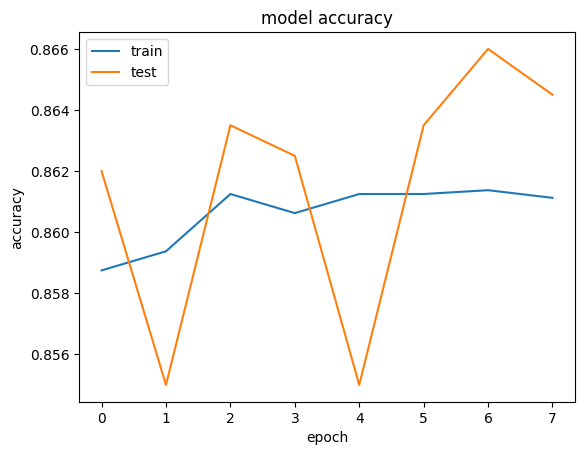

In [121]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

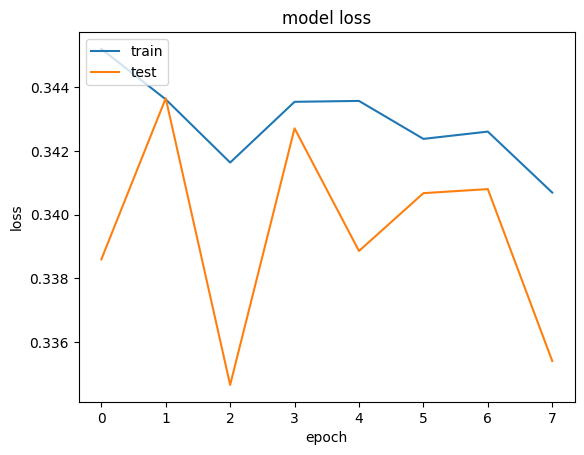

In [122]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [123]:
# Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [124]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1544,   51],
       [ 220,  185]])

In [125]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [126]:
score

0.8645

In [127]:
##get the weights
classifier.get_weights()

[array([[ 1.0159191 ,  1.0831932 , -0.21553786,  0.10791478, -0.46253037,
         -0.2168749 , -0.37253752, -0.23644844, -0.16988471, -0.3631784 ],
        [ 0.91643554, -2.1447985 , -2.2266924 ,  0.3975688 , -2.8424218 ,
         -2.5425794 , -1.6042869 ,  1.4487635 ,  1.153032  ,  2.2699459 ],
        [-0.1548173 , -0.05663154,  0.22232153, -0.1324792 , -0.17114633,
          0.30586085, -0.05717186, -0.01821743,  0.9581085 ,  0.09339927],
        [-1.6643927 ,  0.904415  ,  1.408988  ,  0.9316433 , -0.0078709 ,
         -0.043322  , -2.7916324 , -1.2282491 , -0.45462433,  0.40525648],
        [ 1.0398709 , -0.818934  , -1.4343599 ,  3.3844266 , -0.05924652,
          0.43605062,  0.64312387, -2.8616214 ,  1.0037433 , -0.06825264],
        [-0.14840575,  0.95788324,  0.01614401, -0.03725584, -0.43643486,
         -0.2986854 ,  0.017361  ,  0.1395664 ,  0.5013944 , -0.12888902],
        [ 0.48650348,  0.8920344 , -1.3777547 , -0.11456938, -0.5133177 ,
         -0.9709801 , -0.2075301

In [128]:
## Saving h5 file
classifier.save('model.h5')
#  hdf5 is to store large amount of data in the form of multi-dimensional array

In [129]:
##laoding h5 file
from tensorflow import keras
classifier1=keras.models.load_model('model.h5')

In [130]:
classifier1.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


array([[0.33184612],
       [0.33030397],
       [0.33787066],
       ...,
       [0.33514208],
       [0.33735383],
       [0.33030397]], dtype=float32)

In [131]:

#Hyper parameter tuning


In [132]:
#pip install keras-tuner --upgrade

In [133]:
from kerastuner.tuners import RandomSearch

In [134]:

# --upgrade ensures the latest version is installed
# !pip install keras-tuner --upgrade

# Import required libraries
import keras_tuner  # Keras Tuner for hyperparameter tuning
import keras  # TensorFlow Keras for building deep learning models

In [135]:
"""def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.Dense(
      hp.Choice('units', [8, 16, 32]),
      activation='relu'))
  model.add(keras.layers.Dense(1, activation='relu'))
  model.compile(loss='mse')
  return model"""

def build_model(hp):
  # Function to create and return a Keras model with tunable hyperparameters
  # 'hp' is a special argument provided by Keras Tuner to define tunable hyperparameters simply hyper parameter
  model=Sequential()
  model.add(Dense(units=10,input_shape=(11,),activation='relu'))
  model.add(Dense(units=10,activation='relu'))
  model.add(Dense(units=10,activation='relu'))
  ##  Adding the output layer
  model.add(Dense(1,activation='sigmoid'))
  # to use different different optimizers
  optimizers=hp.Choice("optimizers",values=["adam","sgd","rmsprop","ada_delta"])
  model.compile(optimizer=optimizers,loss="binary_crossentropy",metrics=["accuracy"])
  return model

In [136]:
tuner=RandomSearch(build_model,objective="val_accuracy",max_trials=5,directory="project1",project_name="aps-fault")
# no of trails
# objective what u want to get

Reloading Tuner from project1/aps-fault/tuner0.json


In [139]:
tuner.search(X_train,y_train,validation_data=(X_test,y_test),epochs=5)

In [140]:
tuner.get_best_hyperparameters()[0].values

{'optimizers': 'adam'}

In [141]:
mymodel=tuner.get_best_models(num_models=1)[0]


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [142]:
mymodel.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 351 (1.37 KB)

 Trainable params: 351 (1.37 KB)

 Non-trainable params: 0 (0.00 B)

In [146]:
import time
import os
def save_model_path(model_dir="save_models"):
  os.makedirs(model_dir,exist_ok=True)
  filename=time.strftime("model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path=os.path.join(model_dir,filename)
  print("model will be saved at {model_path}")
  return model_path

In [147]:
classifier.save(save_model_path())

model will be saved at {model_path}


In [148]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [149]:
score

0.8645

In [150]:
##laoding h5 file
from tensorflow import keras
classifier1=keras.models.load_model('model.h5')

In [151]:
classifier1.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


array([[0.33184612],
       [0.33030397],
       [0.33787066],
       ...,
       [0.33514208],
       [0.33735383],
       [0.33030397]], dtype=float32)

In [152]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [153]:
score

0.8645